## Check out the NEID data, specifically the headers.
 Date: 18 March 2021
 

In [2]:
from astropy.io import fits
import numpy as np
from matplotlib import pyplot as plt
from astropy.io.fits import getheader

In [3]:
data_dir = "/Users/hisaacson/Google Drive/My Drive/KPF/data/neid/"
f_L0 = 'neidL0_20201220T031923.fits' # 334 header entries
f_L1 = 'neidL1_20200225T023236.fits' # 738 header entries
#f_L2 = 'neidL2_20200214T170949.fits' # 738 header entries
f_L2 = "neidL2_20220118T021017.fits" # Newest Tau Ceti file from NEID, 8 feb 2022 added

# No.    Name      Ver    Type      Cards   Dimensions   Format
#  0  PRIMARY       1 PrimaryHDU     738   ()      
#  1  SCIFLUX       1 ImageHDU        12   (9216, 117)   float64   
#  2  SKYFLUX       1 ImageHDU        12   (9216, 117)   float64   
#  3  CALFLUX       1 ImageHDU        12   (9216, 117)   float64   
#  4  SCIVAR        1 ImageHDU        12   (9216, 117)   float64   
#  5  SKYVAR        1 ImageHDU        12   (9216, 117)   float64   
#  6  CALVAR        1 ImageHDU        12   (9216, 117)   float64   
#  7  SCIWAVE       1 ImageHDU      1976   (9216, 117)   float64   
#  8  SKYWAVE       1 ImageHDU      1974   ()      
#  9  CALWAVE       1 ImageHDU      1974   ()      

# L1 has same header as L2, but L2 adds four new images: 
# 10  TELLURIC      1 ImageHDU        10   (9216, 117)   float64   
# 11  SKY           1 ImageHDU        10   (9216, 117)   float64   
# 12  CCFS          1 ImageHDU       548   (164, 117)   float64   
# 13  ACTIVITY      1 BinTableHDU     11   0R x 0C   []   

# The difference between the 334 entries in the L0 data and 738 entries in L1/L2 data 

In [4]:
# Open L0 data
print(data_dir+f_L0)
with fits.open(data_dir+f_L0) as hdul0:
    hdul0.info()
    data0 = hdul0['GUIDER'].data
#    data2 = hdul2['SCIFLUX'].data
    head0 = hdul0[0].header
    head1 = hdul0[1].header
    head2 = hdul0[2].header
    
print('HEADER0')    
print(repr(head0)) # prints out header
print('HEADER1')    
print(repr(head1))
print('HEADER2')    
print(repr(head2[:10]))#
# data1.info()

/Users/hisaacson/Google Drive/My Drive/KPF/data/neid/neidL0_20201220T031923.fits
Filename: /Users/hisaacson/Google Drive/My Drive/KPF/data/neid/neidL0_20201220T031923.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     334   ()      
  1  AMPLIFIER 01    1 ImageHDU        25   (1250, 5000)   int16 (rescales to uint16)   
  2  AMPLIFIER 02    1 ImageHDU        25   (1250, 5000)   int16 (rescales to uint16)   
  3  AMPLIFIER 03    1 ImageHDU        25   (1250, 5000)   int16 (rescales to uint16)   
  4  AMPLIFIER 04    1 ImageHDU        25   (1250, 5000)   int16 (rescales to uint16)   
  5  AMPLIFIER 05    1 ImageHDU        25   (1250, 5000)   int16 (rescales to uint16)   
  6  AMPLIFIER 06    1 ImageHDU        25   (1250, 5000)   int16 (rescales to uint16)   
  7  AMPLIFIER 07    1 ImageHDU        25   (1250, 5000)   int16 (rescales to uint16)   
  8  AMPLIFIER 08    1 ImageHDU        25   (1250, 5000)   int16 (rescales to uint16)   
  9

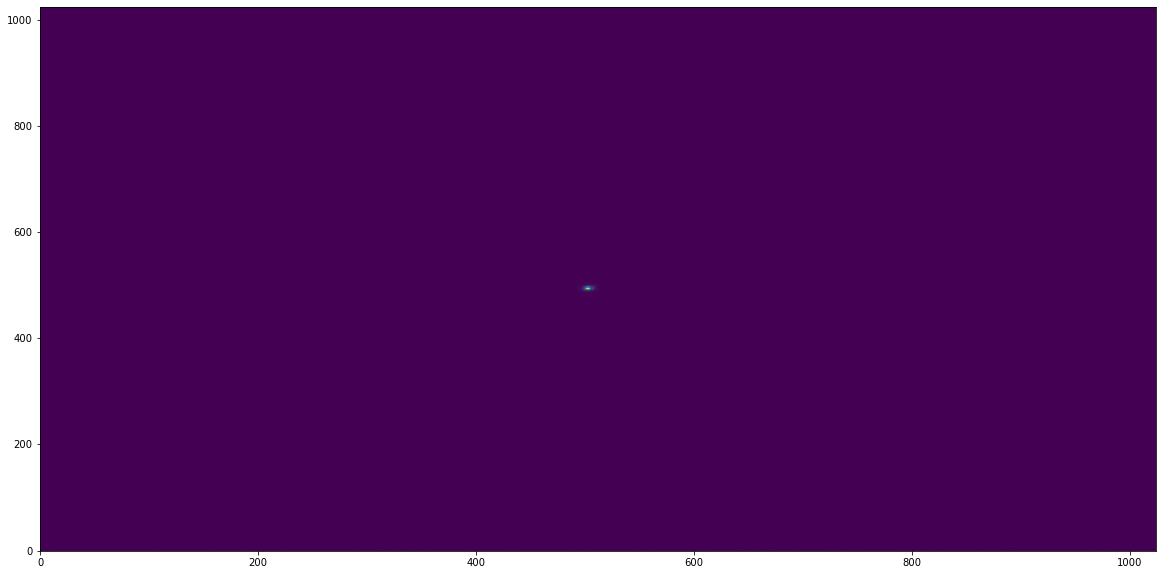

In [5]:
plt.figure(figsize=(20,10))
plt.autoscale(enable=True,axis='both')
plt.imshow(data0,origin = 'lower',aspect = 'auto',vmin=np.median(data0),interpolation = 'none')


In [6]:
# L1 data
print(data_dir+f_L1)
with fits.open(data_dir+f_L1) as hdul1:
    data1  = hdul1['SCIFLUX'].data
    head10 = hdul1[0].header
    head11 = hdul1[1].header
    head14 = hdul1[4].header
    data17 = hdul1[7].data
    head17 = hdul1[7].header
    hdul1.info()
    
# print("head1",repr(head11))
# print("head4",repr(head14))
# print("head7",repr(head17))
# data17

/Users/hisaacson/Google Drive/My Drive/KPF/data/neid/neidL1_20200225T023236.fits
Filename: /Users/hisaacson/Google Drive/My Drive/KPF/data/neid/neidL1_20200225T023236.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     738   ()      
  1  SCIFLUX       1 ImageHDU        12   (9216, 117)   float64   
  2  SKYFLUX       1 ImageHDU        12   (9216, 117)   float64   
  3  CALFLUX       1 ImageHDU        12   (9216, 117)   float64   
  4  SCIVAR        1 ImageHDU        12   (9216, 117)   float64   
  5  SKYVAR        1 ImageHDU        12   (9216, 117)   float64   
  6  CALVAR        1 ImageHDU        12   (9216, 117)   float64   
  7  SCIWAVE       1 ImageHDU      1976   (9216, 117)   float64   
  8  SKYWAVE       1 ImageHDU      1974   ()      
  9  CALWAVE       1 ImageHDU      1974   ()      


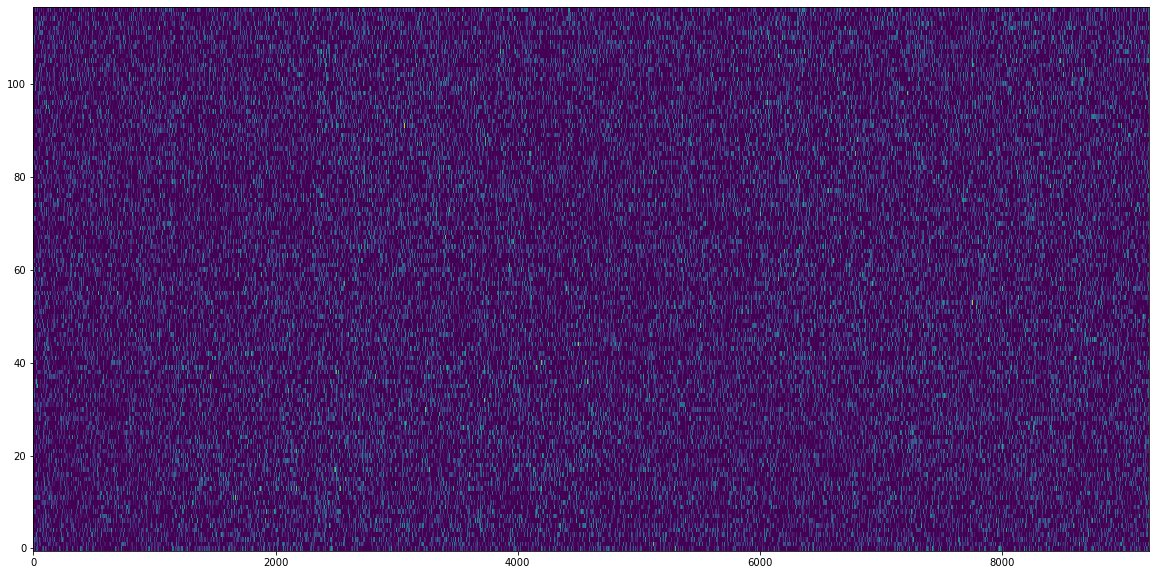

In [7]:
plt.figure(figsize=(20,10))
plt.autoscale(enable=True,axis='both')
#plt.imshow(data2)
plt.imshow(data1[:,0:],origin = 'lower',aspect = 'auto',vmin=0,interpolation = 'none')


In [69]:
# Open L2 data.
print(data_dir+f_L2)
with fits.open(data_dir+f_L2) as hdul2:
    data2 = hdul2['SCIFLUX'].data
    wave2 = hdul2['SCIWAVE'].data
    head2 = hdul2[7].header
    head28 = hdul2[8].header
    hdul2.info()

# head2
print(repr(head2))

/Users/hisaacson/Google Drive/My Drive/KPF/data/neid/neidL2_20220118T021017.fits
Filename: /Users/hisaacson/Google Drive/My Drive/KPF/data/neid/neidL2_20220118T021017.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     747   ()      
  1  SCIFLUX       1 ImageHDU        12   (9216, 122)   float64   
  2  SKYFLUX       1 ImageHDU        12   (9216, 122)   float64   
  3  CALFLUX       1 ImageHDU        12   (9216, 122)   float64   
  4  SCIVAR        1 ImageHDU        12   (9216, 122)   float32   
  5  SKYVAR        1 ImageHDU        12   (9216, 122)   float32   
  6  CALVAR        1 ImageHDU        12   (9216, 122)   float32   
  7  SCIWAVE       1 ImageHDU      2451   (9216, 122)   float64   
  8  SKYWAVE       1 ImageHDU      2451   (9216, 122)   float64   
  9  CALWAVE       1 ImageHDU      2451   (9216, 122)   float64   
 10  TELLURIC      1 ImageHDU        12   (9216, 122)   float64   
 11  SKY           1 ImageHDU         8   () 

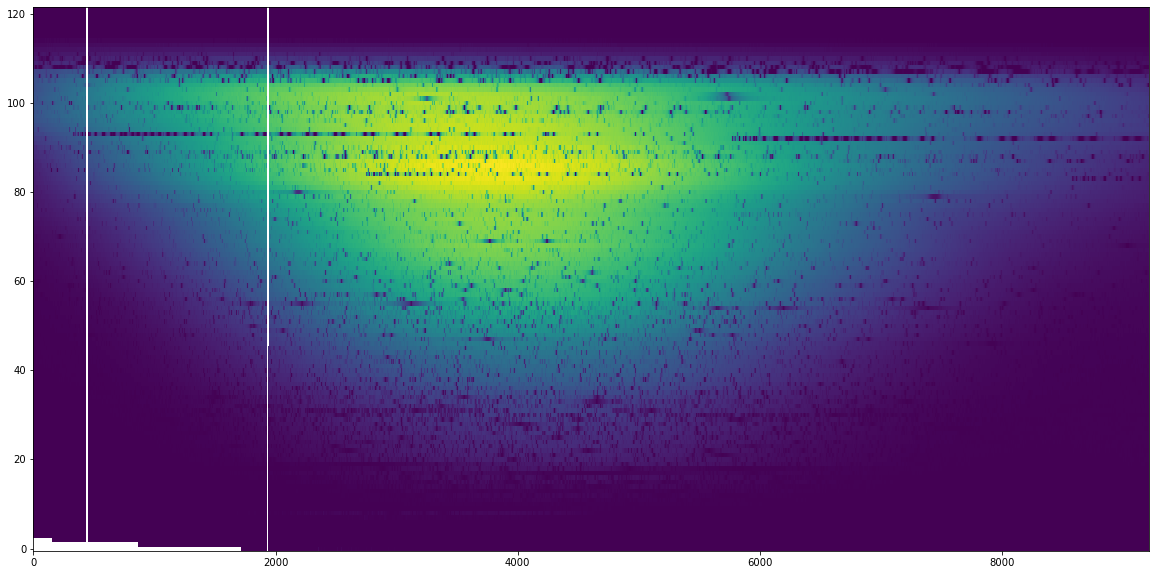

In [70]:
plt.figure(figsize=(20,10))
plt.autoscale(enable=True,axis='both')
#plt.imshow(data2)
plt.imshow(data2[:,0:],origin = 'lower',aspect = 'auto',vmin=0,interpolation = 'none')
#plt.imshow(data1,origin = 'lower',aspect = 'auto',vmin=900,vmax=1.5e3)
#plt.imshow(data2,origin = 'lower',aspect = 'auto',vmin=900,vmax=1.5e3)


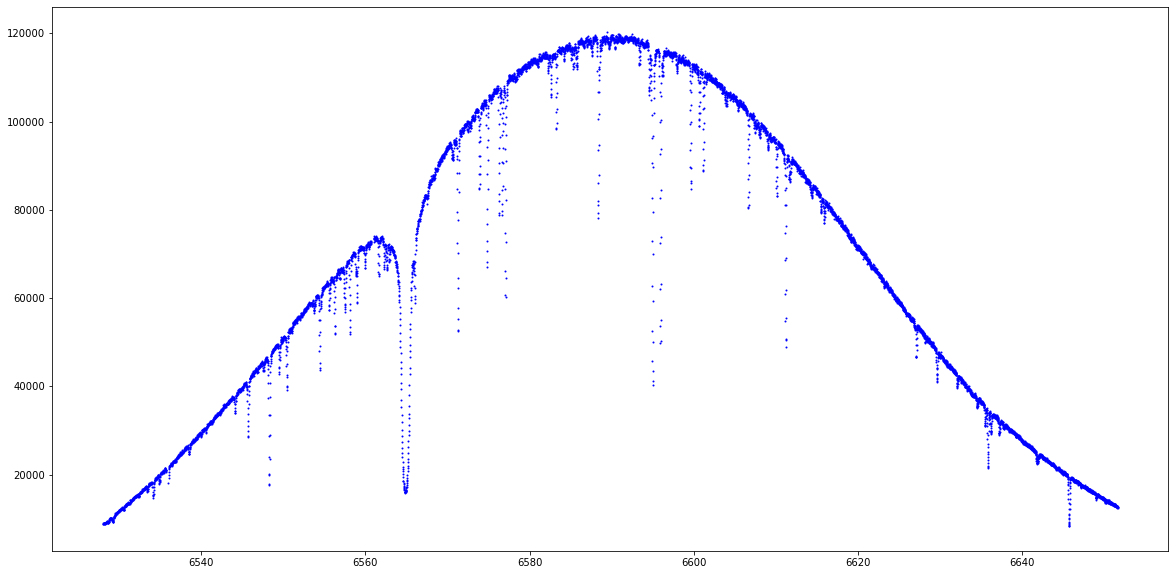

In [73]:
plt.figure(figsize=(20,10))
plt.autoscale(enable=True,axis='both')
#plt.imshow(data2)

order=80  # Order 80?
plt.scatter(wave2[order,0:9000],data2[order,0:9000],s=1,c='b')


In [67]:
# Check out the Activity extension and see how the data and header are organized.
with fits.open(data_dir+f_L2) as hdul2:
    data2 = hdul2['SCIFLUX'].data
    head2 = hdul2[0].header
#    hdul2.info()
#    print(repr(head2))

hdul3 = fits.open(data_dir+f_L2)
head = getheader(data_dir+f_L2)
#hdul3.head
bintable_head = hdul3['Activity'].header
bintable_data = hdul3['Activity'].data
#hd23 = hdul3[12].head
#hdul3.columns
#print(repr(bintable_head))
#print(repr(bintable_data))
print(bintable_data.field(0)) # Prints all of the first entries in every row of a FITS_record
print(bintable_data[0])       # Prints the first row in the FITS_record
print(bintable_data.columns)  # Prints column definitions

['CaIIHK' 'HeI_1' 'HeI_2' 'NaI' 'Ha06_1' 'Ha06_2' 'Ha16_1' 'Ha16_2'
 'CaI_1' 'CaI_2' 'CaIRT1' 'CaIRT2' 'CaIRT3' 'NaINIR' 'PaDelta']
('CaIIHK', 0.13903124743165085, 0.00038854204785905734, '3968.470, 3933.664', 1.09, 3901.07, 4001.07, 20.0, 20.0, '157, 155', '17, 19', '')
ColDefs(
    name = 'INDEX'; format = '10A'
    name = 'VALUE'; format = 'D'
    name = 'UNCERTAINTY'; format = 'D'
    name = 'LINE_CENTER'; format = '20A'; unit = 'Ang'
    name = 'LINE_WIDTH'; format = 'D'; unit = 'Ang'
    name = 'REF_CENTER1'; format = 'D'; unit = 'Ang'
    name = 'REF_CENTER2'; format = 'D'; unit = 'Ang'
    name = 'REF_WIDTH1'; format = 'D'; unit = 'Ang'
    name = 'REF_WIDTH2'; format = 'D'; unit = 'Ang'
    name = 'ORDER_USED'; format = '13A'
    name = 'ORDER_INDEX'; format = '13A'
    name = 'STATUS'; format = '20A'
)


In [29]:
# Open KPF simulated data:
sim_dir = '/Users/hisaacson/ownCloud/KPF-Pipeline-TestData/KPF-Pipeline-TestData/KPF_Simulated_Data/'
sim_sci = 'KPF_simulated_L0_science.fits'

hdu_sim = fits.open(sim_dir+sim_sci)
data1_sim = hdu_sim['GREEN-AMP1'].data
hdu_sim.info()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/hisaacson/ownCloud/KPF-Pipeline-TestData/KPF-Pipeline-TestData/KPF_Simulated_Data/KPF_simulated_L0_science.fits'

NameError: name 'data1_sim' is not defined

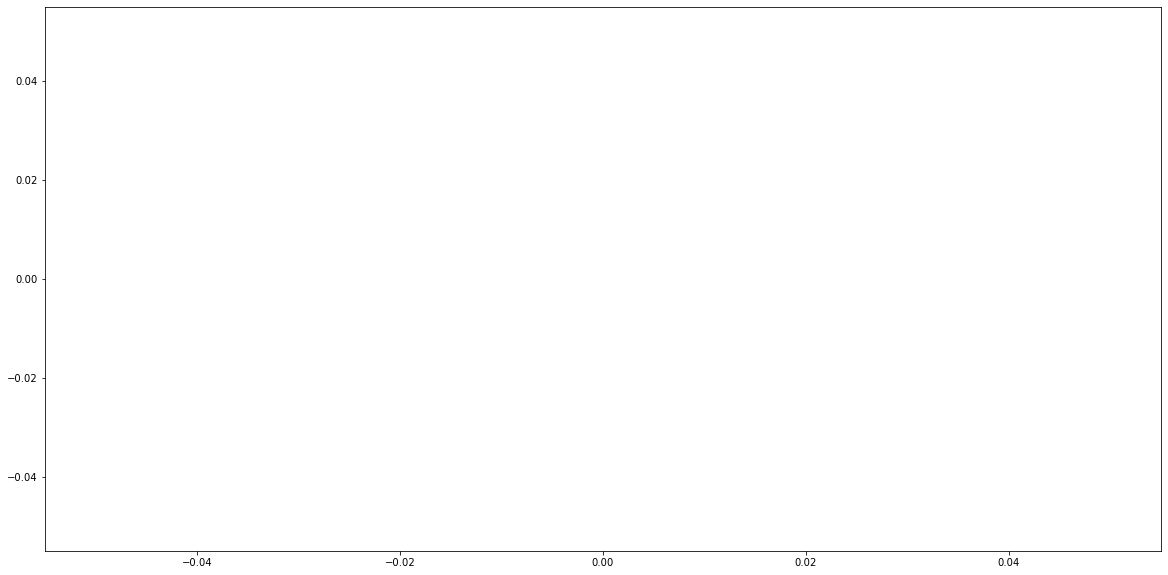

In [30]:
plt.figure(figsize=(20,10))
plt.autoscale(enable=True,axis='both')
#plt.imshow(data2)
plt.imshow(data1_sim[:,0:],origin = 'lower',aspect = 'auto',vmin=0,interpolation = 'none')


In [23]:
#Check out these other files
# Open KPF simulated data:
sim_dir = '/Users/hisaacson/ownCloud/KPF-Pipeline-TestData/KPF-Pipeline-TestData/KPF_Simulated_Data/science/'
#sim_sci = 'kpf_green_L0_20210517T000000.fits'
sim_sci = 'kpf_red_L0_20210525T000000.fits'
hdu_sim = fits.open(sim_dir+sim_sci)
#data1_sim = hdu_sim['GREEN-AMP1'].data
hdu_sim.info()



Filename: /Users/hisaacson/ownCloud/KPF-Pipeline-TestData/KPF-Pipeline-TestData/KPF_Simulated_Data/science/kpf_red_L0_20210525T000000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  DATA          1 PrimaryHDU       8   (4080, 4080)   float32   


In [9]:


# Plot specific features of L2 data, by listing their name, beg_wavelength and ending wavelength

lines = [
['NaD_I',5888,58992],
['NaD_II',5895,5898],
['H_alpha',6562,6564],    
]

In [10]:
# Open L2 data.
print(data_dir+f_L2)
with fits.open(data_dir+f_L2) as hdul2:
    data2 = hdul2['SCIFLUX'].data
    wave2 = hdul2['SCIWAVE'].data
    head2 = hdul2[0].header
    head28 = hdul2[8].header
    hdul2.info()



/Users/hisaacson/Google Drive/My Drive/KPF/data/neid/neidL2_20200214T170949.fits
Filename: /Users/hisaacson/Google Drive/My Drive/KPF/data/neid/neidL2_20200214T170949.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     738   ()      
  1  SCIFLUX       1 ImageHDU        12   (9216, 117)   float64   
  2  SKYFLUX       1 ImageHDU        12   (9216, 117)   float64   
  3  CALFLUX       1 ImageHDU        12   (9216, 117)   float64   
  4  SCIVAR        1 ImageHDU        12   (9216, 117)   float64   
  5  SKYVAR        1 ImageHDU        12   (9216, 117)   float64   
  6  CALVAR        1 ImageHDU        12   (9216, 117)   float64   
  7  SCIWAVE       1 ImageHDU      1976   (9216, 117)   float64   
  8  SKYWAVE       1 ImageHDU      1976   (9216, 117)   float64   
  9  CALWAVE       1 ImageHDU      1976   (9216, 117)   float64   
 10  TELLURIC      1 ImageHDU        10   (9216, 117)   float64   
 11  SKY           1 ImageHDU        10   (92

NameError: name 'wave2' is not defined

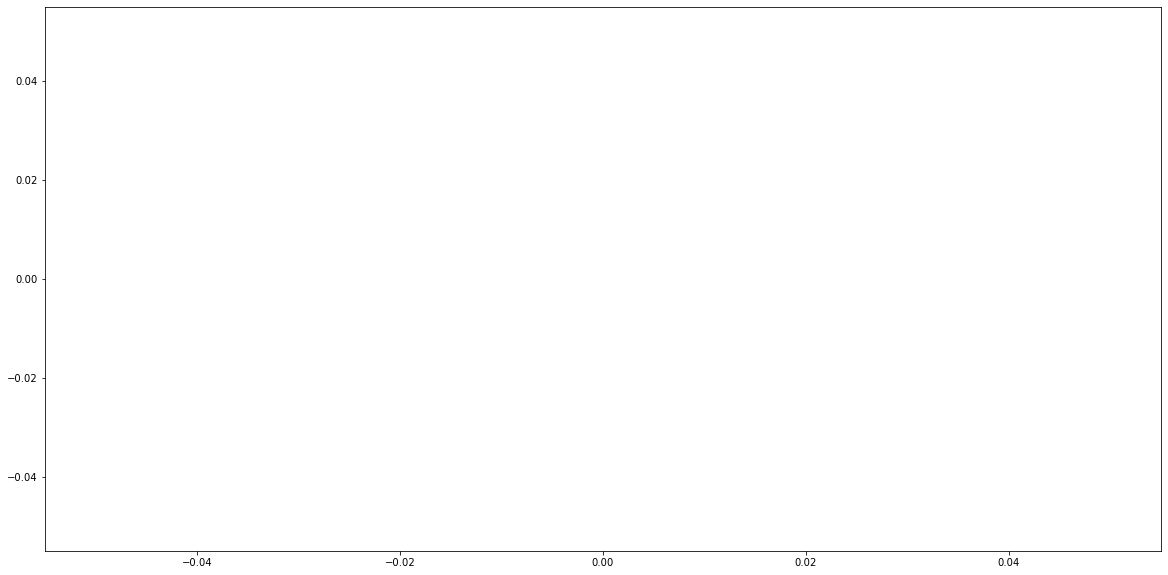

In [12]:
plt.figure(figsize=(20,10))
plt.autoscale(enable=True,axis='both')
#plt.imshow(data2)

i=0
plt.scatter(wave2,data2,s=1,c='b')
plt.show()

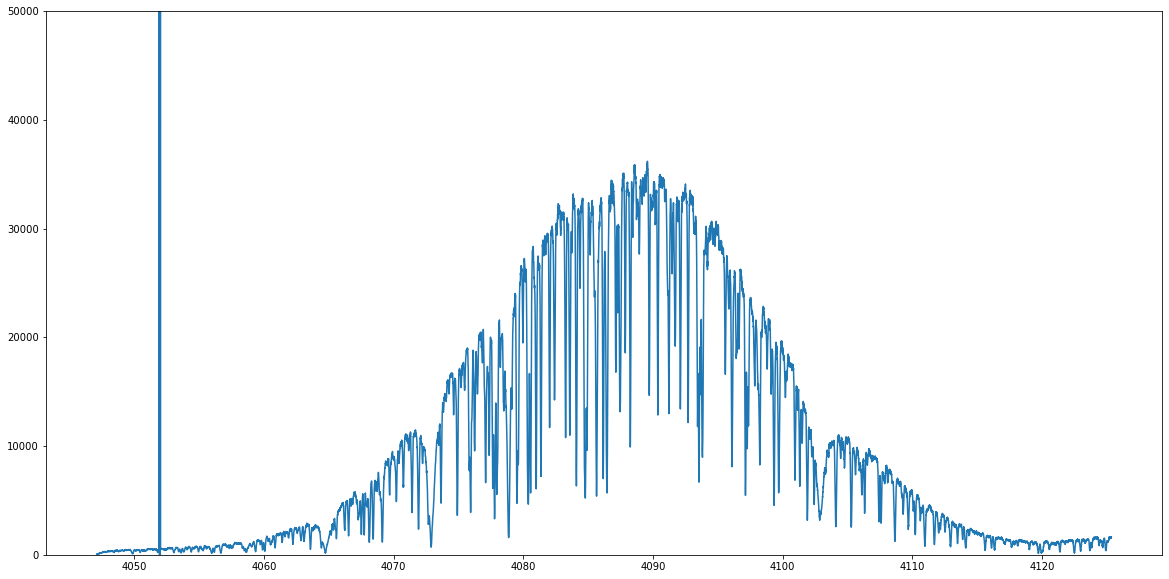

In [26]:
plt.figure(figsize=(20,10))
plt.autoscale(enable=True,axis='both')
#plt.imshow(data2)

i=20
plt.plot(wave2[i,:],data2[i,:])#,c='b-')
plt.ylim(0,5e4)
plt.show()

In [11]:
data_dir = "/Users/hisaacson/ownCloud/KPF-Pipeline-TestData/NEIDdata/TAUCETI_20191217/L2/"
#f_L0 = 'neidL0_20201220T031923.fits' # 334 header entries
#f_L1 = 'neidL1_20200225T023236.fits' # 738 header entries
f_L2 = 'neidL2_20191217T023129.fits' # 738 header entries

# Open L2 data.
print(data_dir+f_L2)
with fits.open(data_dir+f_L2) as hdul2:
    data2 = hdul2['SCIFLUX'].data
#    head2 = hdul2[0].header
#    head28 = hdul2[8].header
    hdul2.info()


/Users/hisaacson/ownCloud/KPF-Pipeline-TestData/NEIDdata/TAUCETI_20191217/L2/neidL2_20191217T023129.fits
Filename: /Users/hisaacson/ownCloud/KPF-Pipeline-TestData/NEIDdata/TAUCETI_20191217/L2/neidL2_20191217T023129.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     738   ()      
  1  SCIFLUX       1 ImageHDU        12   (9216, 117)   float64   
  2  SKYFLUX       1 ImageHDU        12   (9216, 117)   float64   
  3  CALFLUX       1 ImageHDU        12   (9216, 117)   float64   
  4  SCIVAR        1 ImageHDU        12   (9216, 117)   float64   
  5  SKYVAR        1 ImageHDU        12   (9216, 117)   float64   
  6  CALVAR        1 ImageHDU        12   (9216, 117)   float64   
  7  SCIWAVE       1 ImageHDU      1976   (9216, 117)   float64   
  8  SKYWAVE       1 ImageHDU      1976   (9216, 117)   float64   
  9  CALWAVE       1 ImageHDU      1976   (9216, 117)   float64   
 10  TELLURIC      1 ImageHDU        10   (9216, 117)   float64 